Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [2]:
import thinkstats2
pmf = thinkstats2.Pmf(resp.numkdhh)

Display the PMF.

/home/jkim/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


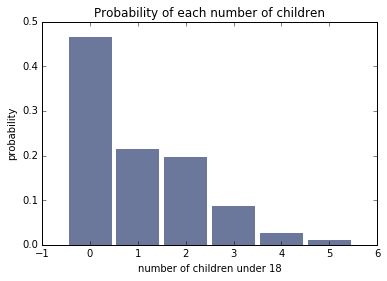

In [3]:
import thinkplot
thinkplot.Hist(pmf)
thinkplot.Config(title = 'Probability of each number of children',
                 xlabel = 'number of children under 18',
                 ylabel = 'probability')

Define <tt>BiasPmf</tt>.

In [4]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [5]:
biaspmf = BiasPmf(pmf, label = 'biased')

Display the actual Pmf and the biased Pmf on the same axes.

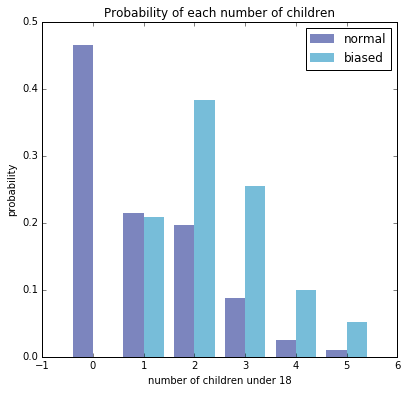

In [6]:
width = 0.4
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf, align='right', width=width, label = 'normal')
thinkplot.Hist(biaspmf, align='left', width=width)
thinkplot.Config(title = 'Probability of each number of children',
                 xlabel = 'number of children under 18',
                 ylabel = 'probability')

Compute the means of the two Pmfs.

In [7]:
print 'The mean of normal pmf is', pmf.Mean()
print 'The mean of biased pmf is', biaspmf.Mean()

The mean of normal pmf is 1.02420515504
The mean of biased pmf is 2.40367910066


### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

In [8]:
import nsfg
p = nsfg.ReadFemPreg()
l = p[p.outcome == 1]

pmap = nsfg.MakePregMap(l)
print type(pmap)

<type 'collections.defaultdict'>


In [9]:
mean = [];
for m in pmap: #for each mom
    if pmap[m] > 1: #if they gave birth to more than one kid
        c = l.loc[pmap[m]] #children
        first = c.prglngth.values[0] #first child
        rest = c.prglngth.values[1:] #other children
        for bl in rest:
            mean.append(first - bl) #difference in birthlength

In [10]:
import numpy as np
print 'The mean difference between first babies and others for the same woman is', np.mean(mean)

The mean difference between first babies and others for the same woman is 0.0859556494192


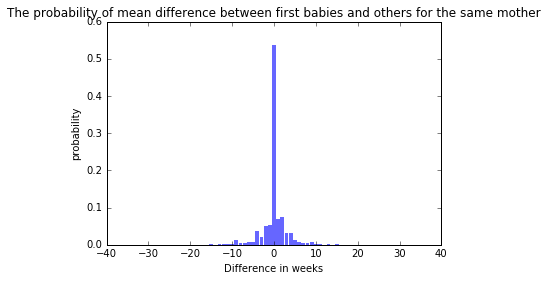

The mean difference between first babies and others for the same woman is 0.0859556494192


In [11]:
pmf3 = thinkstats2.Pmf(mean)
thinkplot.Hist(pmf3)
thinkplot.Show(title = 'The probability of mean difference between first babies and others for the same mother',
               xlabel = 'Difference in weeks',
               ylabel = 'probability')

print 'The mean difference between first babies and others for the same woman is', np.mean(mean)

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.